In [1]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/FEM')
%load_ext autoreload

In [2]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem
from FEMOL_utils import *
np.set_printoptions(linewidth=150)

# Plate bending demo

## creating a square mesh

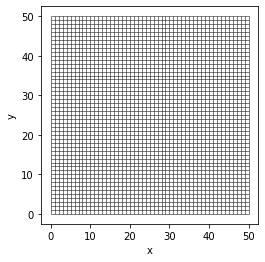

In [3]:
nelx = 50 # elements in the x direction
nely = 50 # elements in the y direction

# Creating the mesh
Lx = nelx
Ly = nely

mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)
mesh.plot()

In [22]:
# Creating a FEM Problem
plate_problem = FEM_Problem(mesh, material=general_carbon())

# Defining bending and plane load tensors
layup = [0, 0, 0, 0]
plate_problem.orthotropic_plane_stress_tensor(layup)
plate_problem.orthotropic_bending_stress_tensor(layup)

# A approximate value for the out-of-plane shear modulus
plate_problem.out_of_plane_shear(1000)

# Compute the element stiffness matrix
plate_problem.complete_plate_Ke()

# Assemble the global stiffness matrix
plate_problem.assemble_plate_K()

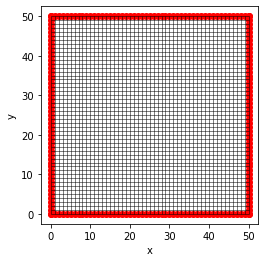

In [23]:
# Defining a fixed domain

fixed_domain = create_domain([0, Lx], [[0, Ly]])
plate_problem.add_fixed_domain(fixed_domain)

fixed_domain = create_domain([[0, Lx]], [0, Ly])
plate_problem.add_fixed_domain(fixed_domain)

plate_problem.fix_boundary()
plate_problem.plot()

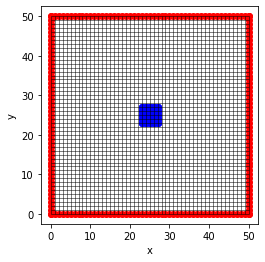

In [37]:
# Defining an applied force
force = [0, 0, 0, 0.01, 0, 0] # Force vector
force_domain = create_domain([[9*Lx/20, 11*Lx/20]], [[9*Ly/20, 11*Ly/20]]) # Domain where the force is applied
plate_problem.add_forces(force, force_domain)
plate_problem.plot()

In [38]:
results = plate_problem.solve()

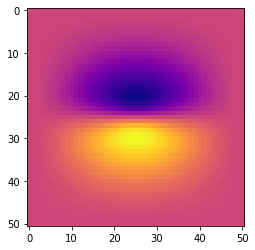

In [54]:
results.Z_displacement_2D()

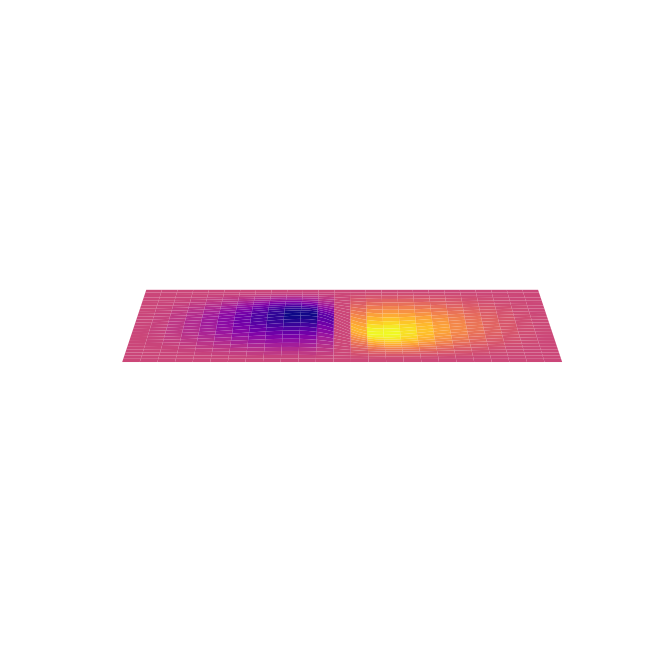

In [53]:
results.Z_displacement_3D(azim=0, elev=10, scale=10)